In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pathlib import Path
import os
import sys
from IPython.display import display

In [3]:
def on_kaggle() -> bool:
    try:
        import gresearch_crypto
        return True
    except ModuleNotFoundError:
        return False

In [4]:
# HYPER PARAMETERS
ON_KAGGLE = on_kaggle()
SAMPLE_LEVEL = 2
USE_SAMPLE = SAMPLE_LEVEL == 1
USE_TOY_SAMPLE = SAMPLE_LEVEL == 2

FORCE_REWRITE = (ON_KAGGLE and SAMPLE_LEVEL == 0)

In [5]:
if not ON_KAGGLE and os.path.abspath('.').endswith('notebook'):
    os.chdir('../')

In [6]:
#IMPORT_SCRIPT!
# THIS CELL WILL BE REMOVE WITH SCRIPTS IN SRC
if './src/' not in sys.path:
    sys.path.append('./src/')

from preprocessing import *
from metrics import *

In [7]:
if ON_KAGGLE:
    RAW_DIR = Path('../input/g-research-crypto-forecasting/')
    SAMPLE_DIR = Path('../input/create-sample-dataset/data/raw/sample/')
    TOY_SAMPLE_DIR = Path('../input/create-sample-dataset/data/raw/toy_sample/')
else:
    RAW_DIR =  Path('data/raw')
    TOY_SAMPLE_DIR = RAW_DIR.joinpath('toy_sample')
    SAMPLE_DIR = RAW_DIR.joinpath('sample')

# filename
TRAIN_FILE = 'train.csv'
ASSET_DETAILS_PATH = RAW_DIR / 'asset_details.csv'

In [8]:
if USE_TOY_SAMPLE:
    print('USING TOY DATASET')
    RAW_TRAIN_PATH = TOY_SAMPLE_DIR / TRAIN_FILE

elif USE_SAMPLE:
    print('USING SAMPLE DATASET')
    RAW_TRAIN_PATH = SAMPLE_DIR / TRAIN_FILE

else:
    print('USING RAW DATASET')
    RAW_TRAIN_PATH = RAW_DIR / TRAIN_FILE

assert RAW_TRAIN_PATH.exists()

USING TOY DATASET


In [9]:
!ls {RAW_DIR}

asset_details.csv		   sample
example_sample_submission.csv	   supplemental_train.csv
example_test.csv		   toy_sample
g-research-crypto-forecasting.zip  train.csv
gresearch_crypto


In [10]:
%%time 
raw_df = pd.read_csv(RAW_TRAIN_PATH)

CPU times: user 387 ms, sys: 58.2 ms, total: 445 ms
Wall time: 444 ms


In [11]:
raw_df = ingest_data(raw_df, asset_details_path=ASSET_DETAILS_PATH)

In [12]:
raw_df.sort_values(by=['Asset_ID', 'date'], inplace=True)
raw_df.reset_index(drop=True, inplace=True)

In [13]:
raw_df.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Asset_Name,date
0,1630454460,0,373.0,462.223511,463.300995,462.200012,463.005493,865.269358,462.689636,0.002667,Binance Coin,2021-09-01 00:01:00
1,1630454520,0,772.0,462.939514,463.106995,461.000000,461.312988,1723.852100,461.899841,0.002237,Binance Coin,2021-09-01 00:02:00
2,1630454580,0,864.0,461.265503,461.330994,459.799988,460.632507,2172.706734,460.532562,0.001018,Binance Coin,2021-09-01 00:03:00
3,1630454640,0,419.0,460.799500,463.000000,460.600006,462.755005,1050.009400,461.469299,0.001898,Binance Coin,2021-09-01 00:04:00
4,1630454700,0,1215.0,462.825989,465.399994,462.726013,465.266998,3102.896636,463.948822,0.001000,Binance Coin,2021-09-01 00:05:00


In [14]:
TARGET = 'Target'
INDEX_COLS = ['Asset_ID', 'Asset_Name', 'date', 'timestamp']

In [15]:
feature_data = compute_features(raw_df)

In [16]:
feature_data = feature_data.dropna(subset=[TARGET]).reset_index(drop=True)

In [17]:
feature_data.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Asset_Name,date,upper_shadow,lower_shador
0,1630454460,0,373.0,462.223511,463.300995,462.200012,463.005493,865.269358,462.689636,0.002667,Binance Coin,2021-09-01 00:01:00,0.295502,0.023499
1,1630454520,0,772.0,462.939514,463.106995,461.000000,461.312988,1723.852100,461.899841,0.002237,Binance Coin,2021-09-01 00:02:00,0.167480,0.312988
2,1630454580,0,864.0,461.265503,461.330994,459.799988,460.632507,2172.706734,460.532562,0.001018,Binance Coin,2021-09-01 00:03:00,0.065491,0.832520
3,1630454640,0,419.0,460.799500,463.000000,460.600006,462.755005,1050.009400,461.469299,0.001898,Binance Coin,2021-09-01 00:04:00,0.244995,0.199493
4,1630454700,0,1215.0,462.825989,465.399994,462.726013,465.266998,3102.896636,463.948822,0.001000,Binance Coin,2021-09-01 00:05:00,0.132996,0.099976


In [18]:
feature_data.tail()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Asset_Name,date,upper_shadow,lower_shador
402816,1632181200,13,986.0,0.090885,0.091054,0.090710,0.090941,5.734456e+06,0.090831,0.000199,TRON,2021-09-20 23:40:00,0.000113,0.000175
402817,1632181260,13,715.0,0.091010,0.091277,0.090980,0.091203,1.989048e+06,0.091125,-0.003477,TRON,2021-09-20 23:41:00,0.000074,0.000030
402818,1632181320,13,527.0,0.091171,0.091295,0.091092,0.091180,2.386078e+06,0.091185,-0.002437,TRON,2021-09-20 23:42:00,0.000115,0.000079
402819,1632181380,13,463.0,0.091206,0.091290,0.091028,0.091081,1.568854e+06,0.091131,0.004843,TRON,2021-09-20 23:43:00,0.000084,0.000053
402820,1632181440,13,512.0,0.090989,0.091133,0.090831,0.090885,1.900695e+06,0.090943,0.004163,TRON,2021-09-20 23:44:00,0.000144,0.000054


In [19]:
PULIC_LB_RANGE = ['2021-06-13 00:00:00',
                  '2021-09-13 00:00:00'] # 3 MONTH WORTH OF DATA

if USE_TOY_SAMPLE:
    EVAL_PERIODS = ['2021-09-15', '2021-09-22']

else:
    EVAL_PERIODS = PULIC_LB_RANGE

In [20]:
valid_idx = feature_data['date'].between(*EVAL_PERIODS)
train_idx = feature_data['date'] < EVAL_PERIODS[0]

In [21]:
train_data = feature_data.loc[train_idx, :].reset_index(drop=True)
valid_data = feature_data.loc[valid_idx, :].reset_index(drop=True)

In [22]:
assert train_data.date.max() < pd.to_datetime(EVAL_PERIODS[0]), \
       'train set includes future data'

In [23]:
train_data.date.dt.date.nunique()

14

In [24]:
valid_data.date.dt.date.nunique()

6

In [25]:
COLUMNS_TO_DROP = [TARGET, 'Asset_Name', 'date', 'timestamp', 'Asset_ID']
FEATURES = train_data.columns.drop(COLUMNS_TO_DROP)
MODEL_PARAMS = {
 'learning_rate': 0.05,
 'subsample': 0.9,
 'colsample_bytree': 0.7,
 'random_state': 2021
}
OUTPUT_PATH = Path('artifacts/baseline/')
if SAMPLE_LEVEL > 0:
    OUTPUT_PATH = OUTPUT_PATH / f'sample/{SAMPLE_LEVEL}'
OUTPUT_PATH.mkdir(exist_ok=True, parents=True)

In [26]:
FEATURES

Index(['Count', 'Open', 'High', 'Low', 'Close', 'Volume', 'VWAP',
       'upper_shadow', 'lower_shador'],
      dtype='object')

In [27]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import joblib

In [28]:
%%time
CRYPTO_MODELS = {}
valid_yhat = np.zeros(len(valid_data))
for crypto, train_crypto in train_data.groupby(by=['Asset_Name']):
    print(f'training model for {crypto}')
    model_path = OUTPUT_PATH / f'{crypto}.pkl'
    if model_path.exists() and (not FORCE_REWRITE):
        model = joblib.load(model_path)
    else:
        model = LGBMRegressor(**MODEL_PARAMS)
        model.fit(train_crypto[FEATURES], train_crypto[TARGET])
        joblib.dump(model, model_path)
    CRYPTO_MODELS[crypto] = model
    crypto_index = valid_data['Asset_Name'] == crypto
    valid_yhat[crypto_index] = model.predict(valid_data.loc[crypto_index, FEATURES])
    

training model for Binance Coin
training model for Bitcoin
training model for Bitcoin Cash
training model for Cardano
training model for Dogecoin
training model for EOS.IO
training model for Ethereum
training model for Ethereum Classic
training model for IOTA
training model for Litecoin
training model for Maker
training model for Monero
training model for Stellar
training model for TRON
CPU times: user 28.4 s, sys: 1.08 s, total: 29.5 s
Wall time: 7.16 s


In [29]:
valid_data['yhat'] = valid_yhat

In [30]:
scores, valid_corrs = compute_metrics(valid_data)

In [31]:
scores

weighted_corr   -0.001978
theor_corr       0.002857
corr_min        -0.045152
corr_max         0.063606
corr_std         0.033563
dtype: float64

In [32]:
valid_corrs

,Asset_Name,corr,weight,weighted_corr
0,Binance Coin,-0.035562,4.304065,-0.153060
1,Bitcoin,-0.006803,6.779922,-0.046122
2,Bitcoin Cash,0.000154,2.397895,0.000368
3,Cardano,0.052704,4.406719,0.232250
4,Dogecoin,-0.011080,3.555348,-0.039393
5,EOS.IO,-0.013241,1.386294,-0.018357
6,Ethereum,-0.028194,5.894403,-0.166187
7,Ethereum Classic,0.002878,2.079442,0.005984
8,IOTA,0.004860,1.098612,0.005340
9,Litecoin,0.063606,2.397895,0.152520


<AxesSubplot:xlabel='Asset_Name'>

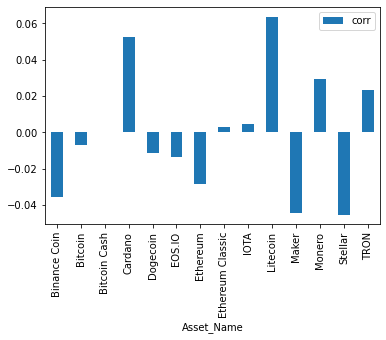

In [33]:
valid_corrs.plot.bar('Asset_Name', 'corr')

In [34]:
fi = pd.concat([pd.DataFrame({'feature': FEATURES,
                              'importance': model.feature_importances_,
                              'crypto': crypto})
                for crypto, model in CRYPTO_MODELS.items()])

In [35]:
fi_stats = fi.groupby('feature').describe().sort_values(('importance', 'mean'), ascending=False)

In [36]:
fi_stats

importance                                                    \
                  count      mean       std       min       25%       50%   
feature                                                                     
Low                14.0  0.142449  0.016892  0.125414  0.129619  0.139559   
VWAP               14.0  0.136886  0.018098  0.090811  0.132616  0.137061   
Close              14.0  0.132371  0.007810  0.120581  0.127572  0.131175   
High               14.0  0.119569  0.012329  0.098484  0.115121  0.119376   
Open               14.0  0.098387  0.009165  0.085555  0.092688  0.097931   
Volume             14.0  0.097617  0.007200  0.080859  0.093876  0.098821   
lower_shador       14.0  0.095409  0.008371  0.085026  0.089812  0.094729   
upper_shadow       14.0  0.089144  0.009380  0.062823  0.086923  0.087762   
Count              14.0  0.088169  0.007361  0.074289  0.083573  0.089388   

                                  
                   75%       max  
feature                           
Low           0.148523  0.186130  
VWAP          0.146661  0.169692  
Close         0.137200  0.147338  
High          0.120038  0.154403  
Open          0.104544  0.119004  
Volume        0.103169  0.107604  
lower_shador  0.097300  0.118015  
upper_shadow  0.095100  0.101654  
Count         0.094506  0.097033

<AxesSubplot:xlabel='importance', ylabel='feature'>

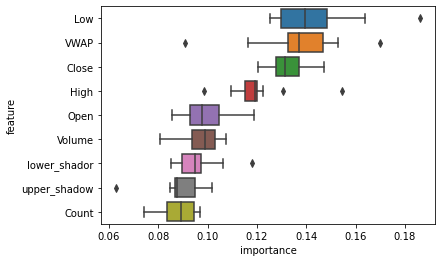

In [37]:
sns.boxplot(x='importance', y='feature',
            data=fi,
            order=fi_stats.index)

In [1]:
from sklearn.model_selection import GroupTimeSeriesSplit

ImportError: cannot import name 'GroupTimeSeriesSplit' from 'sklearn.model_selection' (/home/med/anaconda3/envs/crypto-g/lib/python3.7/site-packages/sklearn/model_selection/__init__.py)

In [38]:
fi_crypto_table = fi.pivot('feature', 'crypto', 'importance')
fi_crypto_table.style.background_gradient(cmap="viridis", axis=1)


crypto,Binance Coin,Bitcoin,Bitcoin Cash,Cardano,Dogecoin,EOS.IO,Ethereum,Ethereum Classic,IOTA,Litecoin,Maker,Monero,Stellar,TRON
feature,,,,,,,,,,,,,,
Close,0.121112,0.126420,0.126984,0.139011,0.120581,0.130955,0.130049,0.137651,0.132433,0.147338,0.144082,0.135844,0.131395,0.129339
Count,0.095713,0.097033,0.095049,0.080379,0.093682,0.093371,0.094780,0.086147,0.074289,0.089633,0.077018,0.089143,0.083081,0.085050
High,0.120063,0.115732,0.119752,0.109671,0.112942,0.119962,0.122351,0.119210,0.119543,0.154403,0.098484,0.114917,0.130574,0.116358
Low,0.147082,0.125414,0.149003,0.136149,0.163687,0.125785,0.127311,0.139475,0.129513,0.186130,0.142290,0.129937,0.152860,0.139642
Open,0.104970,0.103266,0.106472,0.087334,0.093565,0.119004,0.107589,0.097828,0.085555,0.098499,0.092497,0.098034,0.093262,0.089546
VWAP,0.134107,0.147670,0.132119,0.169692,0.116536,0.134441,0.131444,0.138894,0.146696,0.090811,0.153031,0.135228,0.139178,0.146554
Volume,0.095224,0.099256,0.098385,0.095345,0.107604,0.100770,0.104901,0.099829,0.093426,0.080859,0.089175,0.103969,0.092677,0.105210
lower_shador,0.094808,0.098258,0.085026,0.096144,0.095125,0.090735,0.094650,0.089393,0.118015,0.089504,0.106445,0.091273,0.088661,0.097685
upper_shadow,0.086923,0.086950,0.087210,0.086274,0.096276,0.084977,0.086925,0.091573,0.100529,0.062823,0.096977,0.101654,0.088314,0.090616
